## Градиентный бустинг (AdaBoost)

#### Задание 1. 
Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

In [5]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [6]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [19]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

### Построим графики зависимости ошибки от количества деревьев в ансамбле

Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2830.1965128138204
Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3348.8479083748343


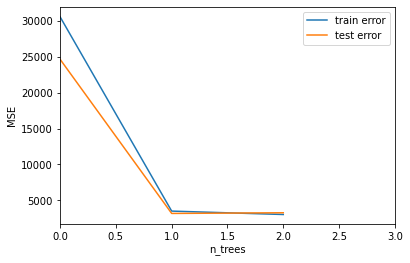

In [20]:
# Число деревьев в ансамбле
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

trees, train_err, test_err = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees,  train_err, test_err)

Ошибка алгоритма из 10 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 1931.5010601372262
Ошибка алгоритма из 10 деревьев глубиной 2     с шагом 1 на тестовой выборке: 2902.4241350890047


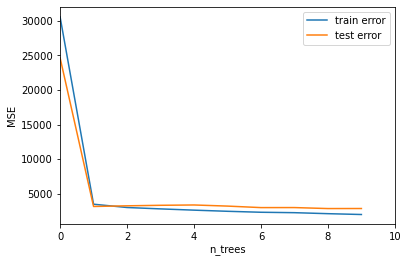

In [21]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

# Модель
model = gb_fit

trees, train_err, test_err = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees,  train_err, test_err)

С увеличением количества деревьев наблюдается уменьшение ошибки как на __train__, так и на __test__

Ошибка алгоритма из 50 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 600.374486644484
Ошибка алгоритма из 50 деревьев глубиной 2     с шагом 1 на тестовой выборке: 4125.690011553426


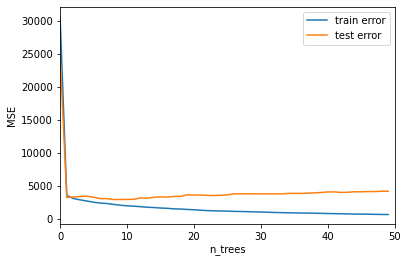

In [22]:
# Число деревьев в ансамбле
n_trees = 50

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

# Модель
model = gb_fit

trees, train_err, test_err = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees,  train_err, test_err)

Увеличев ещё количество деревьев, наблюдаем уменьшение ошибки на __train__, но на __test__ ошибка увеличилась, что говорит о переобучении. Лучше использовать не большое количество деревьев.

### Изменим шаг

Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2830.1965128138204
Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3348.8479083748343


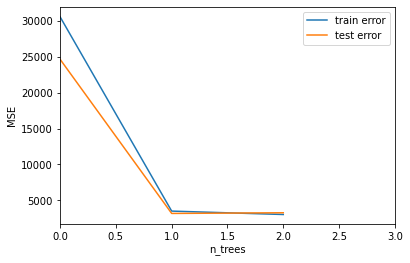

In [23]:
# Число деревьев в ансамбле
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

# Модель
model = gb_fit

trees, train_err, test_err = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees,  train_err, test_err)

Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 1729.5866841414174
Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 1 на тестовой выборке: 3778.238343398097


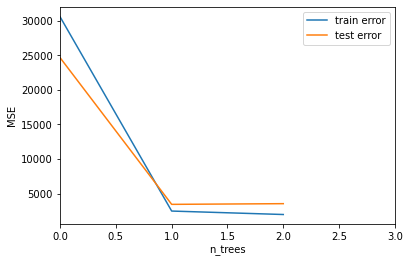

In [24]:
# Число деревьев в ансамбле
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 1

# Модель
model = gb_fit

trees, train_err, test_err = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees,  train_err, test_err)

С увеличением глубины растет ошибка на __test__, на __train__ напротив умешается.

Ошибка алгоритма из 3 деревьев глубиной 8     с шагом 1 на тренировочной выборке: 97.8739713413485
Ошибка алгоритма из 3 деревьев глубиной 8     с шагом 1 на тестовой выборке: 5717.670017477849


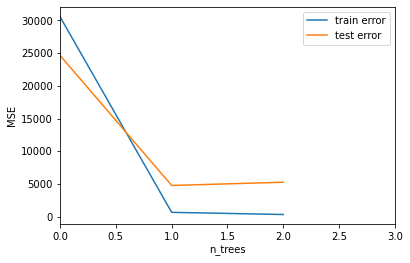

In [25]:
# Число деревьев в ансамбле
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 8

# Шаг
eta = 1

# Модель
model = gb_fit

trees, train_err, test_err = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees,  train_err, test_err)

При еще большем увелечении глубины, ошибка на __train__ значительно уменьшилась, но на __test__ увеличилась почти в __2__ раза по сравнению с глубиной деревьев 2.

#### Задание 2. 
(опция). Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [26]:
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, qty_in_batch):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # генерируем случайную подвыборку
            qnt = np.random.choice(range(0, len(X_train)), size=qty_in_batch, replace=False)
            X_train, y_train = X_train[qnt], y_train[qnt]
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

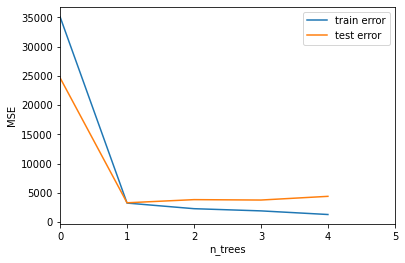

In [27]:
# Число деревьев в ансамбле
n_trees = 5

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

qty_in_batch = 64

trees, train_err, test_err = sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, qty_in_batch)
get_error_plot(n_trees,  train_err, test_err)

### Построим график c градиентным бустингом и стохастическим градиентным бустингом

In [ ]:
# trees, train_err, test_err = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
# trees, train_err, test_err = sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, qty_in_batch)

In [57]:
trees, gb_train_err, gb_test_err = gb_fit(5, 2, X_train, X_test, y_train, y_test, coefs, eta)
trees, sgb_train_err, sgb_test_err = sgb_fit(5, 2, X_train, X_test, y_train, y_test, coefs, eta, 64)

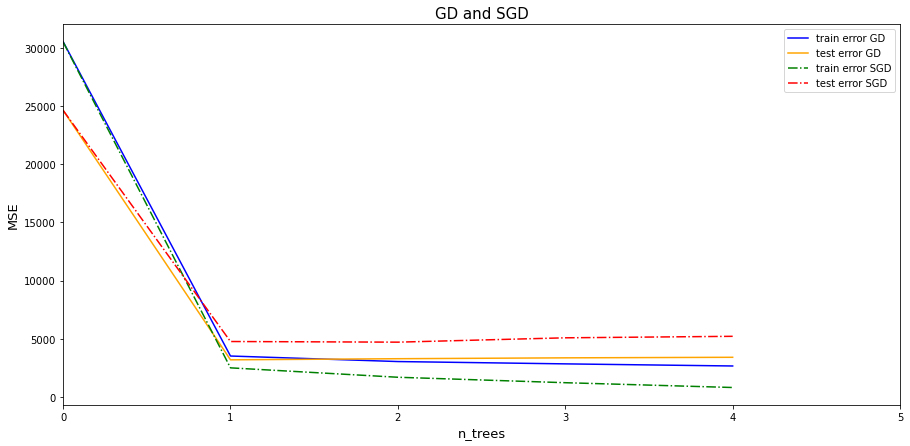

In [58]:
fig = plt.figure(figsize=(15, 7))
plt.title("GD and SGD", size=15)
plt.xlabel('n_trees', size=13)
plt.ylabel('MSE', size=13)
plt.xlim(0, n_trees)

plt.plot(gb_train_err, label="train error GD", color="blue")
plt.plot(gb_test_err, label="test error GD", color="orange")
plt.plot(sgb_train_err, label="train error SGD", linestyle="-.", color="green")
plt.plot(sgb_test_err, label="test error SGD", linestyle="-.", color="red")

plt.legend(loc='upper right')
plt.show()

#### Задание 3. 
(опция). Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.